In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection 

#### Collecting the data from yahoo finance

In [2]:
# set current date time
now = datetime.now()

#ticker is symbol of the stock
#download data from yfinance
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2016-02-08   21.538044   21.694461   21.091460   21.111861  216085600
2016-02-09   21.533508   21.748867   21.293215   21.374824  177324800
2016-02-10   21.370291   21.841811   21.331753   21.744334  169374400
2016-02-11   21.241076   21.472303   20.989447   21.261479  200298800
2016-02-12   21.306814   21.422428   21.084657   21.352154  161405600
...                ...         ...         ...         ...        ...
2026-01-30  259.480011  261.899994  252.179993  255.169998   92443400
2026-02-02  270.010010  270.489990  259.209991  260.029999   73913400
2026-02-03  269.480011  271.880005  267.609985  269.200012   64394700
2026-02-04  276.489990  278.950012  272.290009  272.290009   90458500
2026-02-05  276.390015  279.500000  273.230011  278.019989   30247533

[2514 rows x 5 colu

In [3]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-08,21.538044,21.694461,21.091460,21.111861,216085600
2016-02-09,21.533508,21.748867,21.293215,21.374824,177324800
2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400
2016-02-11,21.241076,21.472303,20.989447,21.261479,200298800
2016-02-12,21.306814,21.422428,21.084657,21.352154,161405600


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-30,259.480011,261.899994,252.179993,255.169998,92443400
2026-02-02,270.010010,270.489990,259.209991,260.029999,73913400
2026-02-03,269.480011,271.880005,267.609985,269.200012,64394700
2026-02-04,276.489990,278.950012,272.290009,272.290009,90458500
2026-02-05,276.390015,279.500000,273.230011,278.019989,30247533


# 2. Data Exploration and Visualization

In [5]:
df.shape

(2514, 5)

In [6]:
# describe function displays statistical overview of the dataframe
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,116.565182,117.721013,115.292953,116.454825,9.992420e+07
std,74.147921,74.855988,73.366730,74.078924,5.587509e+07
min,20.604078,20.907422,20.405656,20.526541,1.791060e+07
25%,42.012209,42.642123,41.832555,42.053192,6.079935e+07
50%,122.789536,124.020688,121.571262,122.649773,8.788365e+07
75%,173.021870,175.156636,171.519063,172.949772,1.219408e+08
max,286.190002,288.619995,283.299988,286.200012,4.584084e+08


In [7]:
# resetting index insted of the date
df = df.reset_index()

In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-02-08,21.538044,21.694461,21.091460,21.111861,216085600
1,2016-02-09,21.533508,21.748867,21.293215,21.374824,177324800
2,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400
3,2016-02-11,21.241076,21.472303,20.989447,21.261479,200298800
4,2016-02-12,21.306814,21.422428,21.084657,21.352154,161405600


In [9]:
# check for null values in datasets
df.isna().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Text(0, 0.5, 'Close Price')

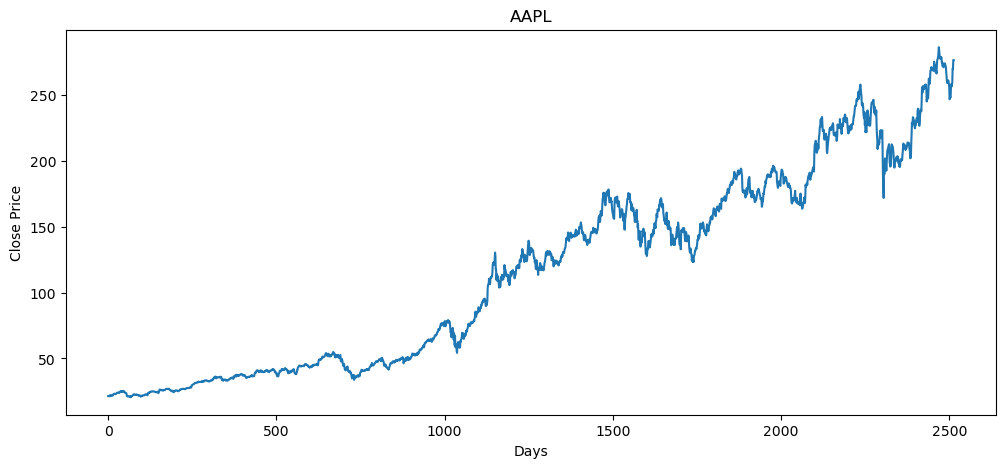

In [10]:
#plot or visualize
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Close Price")

# 3. Feature Engineering

In [11]:
#stock values are identified by moving average
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [12]:
df1 = pd.DataFrame(temp_df)

In [13]:
#calculate moving average using rolling function
df1['Moving avg5'] = df1.rolling(5).mean()

In [14]:
df1.tail()


,0,Moving avg5
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### moving average of 100 days stock value from data set


In [15]:
df['MA_100'] = df.Close.rolling(100).mean()

In [16]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-02-08,21.538044,21.694461,21.091460,21.111861,216085600,NaN
1,2016-02-09,21.533508,21.748867,21.293215,21.374824,177324800,NaN
2,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400,NaN
3,2016-02-11,21.241076,21.472303,20.989447,21.261479,200298800,NaN
4,2016-02-12,21.306814,21.422428,21.084657,21.352154,161405600,NaN
...,...,...,...,...,...,...,...
98,2016-06-28,21.345310,21.361277,21.014606,21.187941,161779600,NaN
99,2016-06-29,21.530045,21.564256,21.354428,21.431973,146124000,22.714101
100,2016-06-30,21.803740,21.842511,21.507246,21.539176,143345600,22.716758


Text(0, 0.5, 'Price')

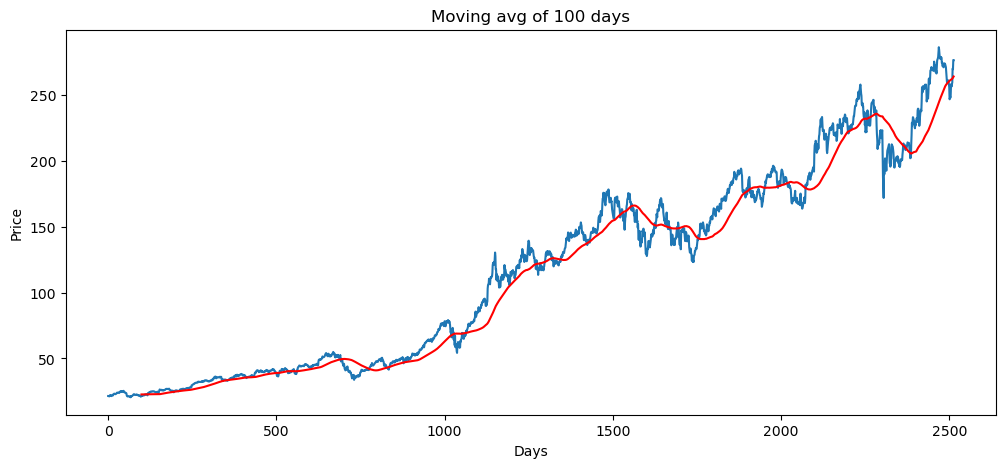

In [17]:
#plotting in graph
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title("Moving avg of 100 days")
plt.xlabel("Days")
plt.ylabel("Price")


#### 200 days moving average

In [18]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-02-08,21.538044,21.694461,21.091460,21.111861,216085600,NaN,NaN
1,2016-02-09,21.533508,21.748867,21.293215,21.374824,177324800,NaN,NaN
2,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400,NaN,NaN
3,2016-02-11,21.241076,21.472303,20.989447,21.261479,200298800,NaN,NaN
4,2016-02-12,21.306814,21.422428,21.084657,21.352154,161405600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-17,25.341869,25.434064,25.083727,25.309602,110528000,24.790895,NaN
199,2016-11-18,25.367224,25.477858,25.275031,25.288860,113715600,24.829267,23.771684
200,2016-11-21,25.752140,25.812065,25.355705,25.381058,117058400,24.868751,23.792754


Text(0, 0.5, 'Price')

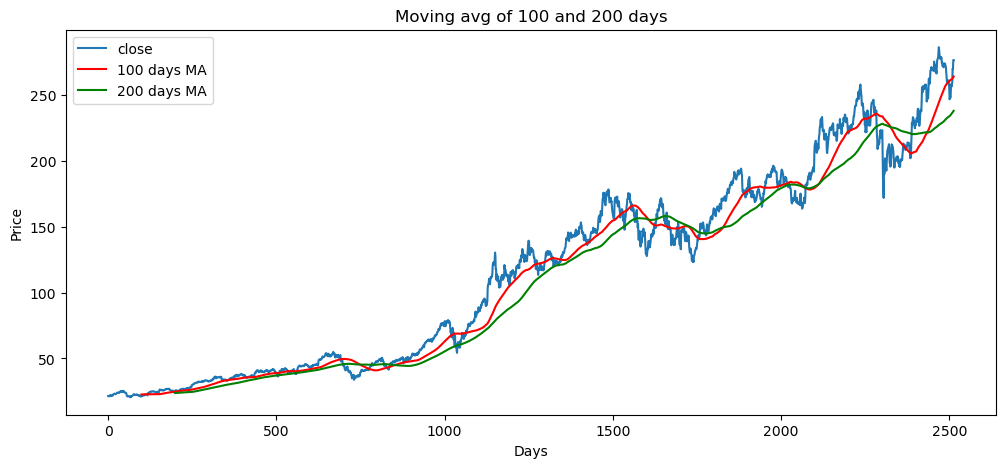

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close, label = 'close')
plt.plot(df['MA_100'],'r', label='100 days MA')
plt.plot(df['MA_200'], 'g', label='200 days MA')
plt.legend()
plt.title("Moving avg of 100 and 200 days")
plt.xlabel("Days")
plt.ylabel("Price")

#### percentage changed in each trading session

In [20]:
df['Percentage Change'] = df.Close.pct_change()

In [21]:
df['Percentage Change']

0            NaN
1      -0.000211
2      -0.007580
3      -0.006046
4       0.003095
          ...   
2509    0.004646
2510    0.040581
2511   -0.001963
2512    0.026013
2513   -0.000362
Name: Percentage Change, Length: 2514, dtype: float64

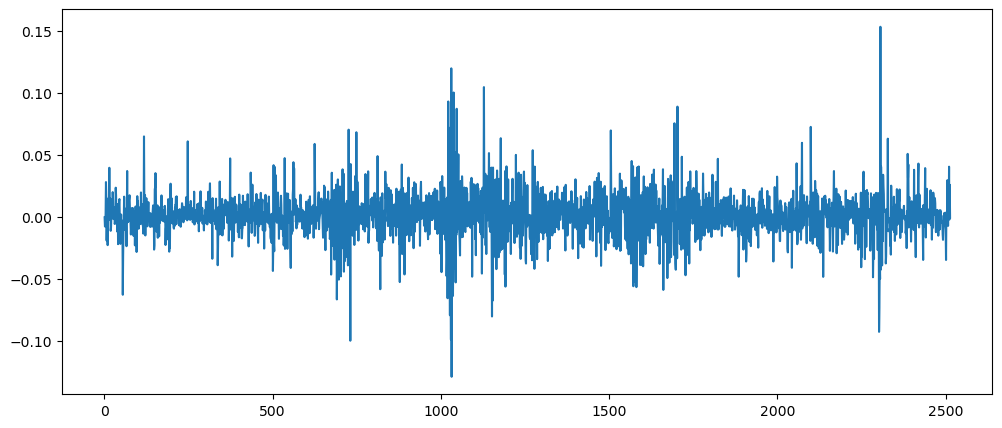

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])

# 4. Data Preprocessing using SKLearn

In [23]:
# splitting data into training and testing data sets
#this is 70% data
data_training = pd.DataFrame(df.Close[:int(len(df)*0.7)])
# 30% data
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [24]:
data_training

Ticker,AAPL
0,21.538044
1,21.533508
2,21.370291
3,21.241076
4,21.306814
...,...
1754,141.820450
1755,143.761169
1756,140.874741
1757,142.145538


In [25]:
data_testing

Ticker,AAPL
1759,148.578522
1760,152.203812
1761,149.474960
1762,152.351593
1763,149.662155
...,...
2509,259.480011
2510,270.010010
2511,269.480011
2512,276.489990


In [26]:
# scaling data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

In [28]:
data_training_array

array([[0.00592369],
       [0.00589492],
       [0.00485971],
       ...,
       [0.76281815],
       [0.7708782 ],
       [0.77800114]])

# 5. Sequence Creation

##### LSTM model require the data should be in sequential manner

In [29]:
# x_train is the input and y_train is predicted output
#feed 100 sequencial data to the model to learn


In [30]:
x_train = []
y_train = []

In [31]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0]) #here [i=row, 0=column]

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train

array([[[0.00592369],
        [0.00589492],
        [0.00485971],
        ...,
        [0.00245912],
        [0.00470127],
        [0.00587295]],

       [[0.00589492],
        [0.00485971],
        [0.00404016],
        ...,
        [0.00470127],
        [0.00587295],
        [0.00760887]],

       [[0.00485971],
        [0.00404016],
        [0.00445711],
        ...,
        [0.00587295],
        [0.00760887],
        [0.00802837]],

       ...,

       [[0.8332614 ],
        [0.84218162],
        [0.83282473],
        ...,
        [0.75569511],
        [0.76881632],
        [0.78112536]],

       [[0.84218162],
        [0.83282473],
        [0.8509769 ],
        ...,
        [0.76881632],
        [0.78112536],
        [0.76281815]],

       [[0.83282473],
        [0.8509769 ],
        [0.88877851],
        ...,
        [0.78112536],
        [0.76281815],
        [0.7708782 ]]])

# 6. Model Building.

##### Using TensorFlow ==> It is a framework for numerical computation, provides various tools for training, deploying deep learning models
##### Keras is highlevel api for neural network 

In [33]:
import tensorflow as tf


In [34]:
# ML Model:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [35]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM( units = 128, activation = 'tanh', return_sequences=True))
model.add(LSTM( units = 64 ))
model.add(Dense( 25 ))
model.add(Dense( 1 ))

# 7. Model Training and save trained model

In [36]:
# compile model using optimizer called 'adam'(algorithm for optimizing )
model.compile( optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) # epochs is like reading data how many times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0174
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 6.8897e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 6.4853e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 6.1414e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.8970e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.8671e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 6.2192e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.1782e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.6659e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.9407e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 6.0483e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.6237e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.2603e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.1014e-04
Epoch 15/50
52/52 ━

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [38]:
#saving the trained model
model.save('stock_predictor_model.keras')

# 8. Preparing the Test Data

##### By using 30% of the data

In [39]:
# we need last hundred days data 
past_hundred_data = data_training.tail(100)

In [40]:
#concat with test data
final_df = pd.concat([past_hundred_data, data_testing], ignore_index=True)

In [41]:
final_df

Ticker,AAPL
0,154.774399
1,160.734436
2,151.302643
3,152.748383
4,149.856903
...,...
850,259.480011
851,270.010010
852,269.480011
853,276.489990


In [42]:
#scaling the data between 0 and 1
input_data = scaler.fit_transform(final_df)
input_data

array([[1.93908036e-01],
       [2.30466390e-01],
       [1.72612585e-01],
       [1.81480628e-01],
       [1.63744542e-01],
       [1.53669671e-01],
       [1.76473611e-01],
       [1.91072823e-01],
       [1.71888713e-01],
       [1.65976341e-01],
       [1.52040818e-01],
       [1.54091977e-01],
       [1.60064250e-01],
       [1.48481546e-01],
       [1.04080495e-01],
       [7.82605147e-02],
       [1.03899761e-01],
       [1.25919272e-01],
       [1.27728765e-01],
       [1.21877043e-01],
       [8.96622973e-02],
       [9.16530863e-02],
       [8.29657776e-02],
       [7.91049387e-02],
       [1.07157373e-01],
       [7.93462294e-02],
       [1.03658189e-01],
       [1.11741990e-01],
       [1.12405774e-01],
       [1.09570093e-01],
       [1.32977259e-01],
       [1.46128634e-01],
       [1.63563434e-01],
       [1.45525594e-01],
       [1.18076668e-01],
       [1.84074737e-01],
       [1.69596263e-01],
       [1.53368105e-01],
       [1.19464136e-01],
       [8.23626443e-02],


In [43]:
input_data.shape

(855, 1)

In [44]:
#creating sequence
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])



In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [46]:
x_test

array([[[0.19390804],
        [0.23046639],
        [0.17261258],
        ...,
        [0.10864873],
        [0.1164437 ],
        [0.12333237]],

       [[0.23046639],
        [0.17261258],
        [0.18148063],
        ...,
        [0.1164437 ],
        [0.12333237],
        [0.15590306]],

       [[0.17261258],
        [0.18148063],
        [0.16374454],
        ...,
        [0.12333237],
        [0.15590306],
        [0.17814028]],

       ...,

       [[0.63429825],
        [0.65415288],
        [0.67890999],
        ...,
        [0.82880245],
        [0.83616322],
        [0.90075332]],

       [[0.65415288],
        [0.67890999],
        [0.69502649],
        ...,
        [0.83616322],
        [0.90075332],
        [0.89750236]],

       [[0.67890999],
        [0.69502649],
        [0.70391203],
        ...,
        [0.90075332],
        [0.89750236],
        [0.94050096]]])

# 9. Making Predictions

In [47]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [48]:
y_predicted

array([[0.11946902],
       [0.13261136],
       [0.15186128],
       [0.16069219],
       [0.16971678],
       [0.16984507],
       [0.16554031],
       [0.16250323],
       [0.16687372],
       [0.17040421],
       [0.17711362],
       [0.17888178],
       [0.17637256],
       [0.16523023],
       [0.15688428],
       [0.15315819],
       [0.14654566],
       [0.1439607 ],
       [0.14226538],
       [0.13720715],
       [0.13411447],
       [0.14264007],
       [0.15712464],
       [0.16366574],
       [0.16833557],
       [0.16598114],
       [0.15833522],
       [0.15608692],
       [0.1603924 ],
       [0.1658547 ],
       [0.17579868],
       [0.18161765],
       [0.1894322 ],
       [0.1989607 ],
       [0.20224442],
       [0.20521244],
       [0.20991927],
       [0.20898072],
       [0.20578168],
       [0.21021132],
       [0.21844798],
       [0.23040153],
       [0.24168634],
       [0.24717872],
       [0.24476786],
       [0.2436126 ],
       [0.23712166],
       [0.229

In [49]:
# need to revert the scaled data into original data to see the difference between prediction and actual, this is known as "Inverse Transform"
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [50]:
y_predicted

array([142.63875, 144.78133, 147.9196 , 149.35928, 150.83054, 150.85146,
       150.14966, 149.65453, 150.36705, 150.94261, 152.03644, 152.3247 ,
       151.91562, 150.09912, 148.7385 , 148.13103, 147.05301, 146.63158,
       146.3552 , 145.53056, 145.02637, 146.41629, 148.77766, 149.84406,
       150.60538, 150.22153, 148.97504, 148.60849, 149.31041, 150.20093,
       151.82207, 152.77072, 154.04471, 155.59813, 156.13347, 156.61734,
       157.38467, 157.23167, 156.71013, 157.4323 , 158.7751 , 160.72386,
       162.5636 , 163.45901, 163.06596, 162.87764, 161.81943, 160.55255,
       159.49368, 160.92397, 162.27084, 163.10588, 163.95726, 164.90276,
       165.10265, 164.42473, 163.94392, 163.10757, 162.53937, 164.03136,
       165.9092 , 167.1097 , 167.25266, 166.66183, 165.4986 , 167.72661,
       169.78824, 170.3032 , 170.9931 , 171.49219, 171.36151, 170.96259,
       170.68843, 170.82272, 171.96518, 172.8981 , 173.00658, 171.8121 ,
       170.97496, 171.02553, 172.2454 , 173.98497, 

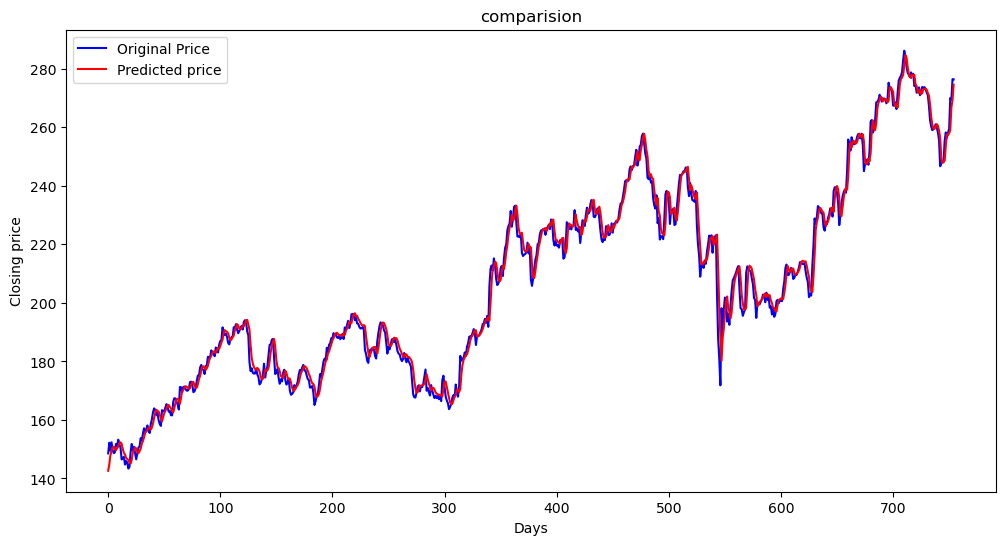

In [51]:
# compare original and predicted values by plotting graph
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.title('comparision')
plt.xlabel('Days')
plt.ylabel("Closing price")
plt.legend()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.title('comparision')
plt.xlabel('Days')
plt.ylabel("Closing price")
plt.legend()
plt.xlim(450, 750)
plt.ylim(180,260)

# 10. Model Evaluation

In [ ]:
# using 3 matrices

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. MSE => Mean Squared Error =>measures average square diff b/w actual and predicted, lower mse = good model
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean squared error : {mse}')

In [ ]:
# Root mean squared error(RMSE) ; lower rmse = good model
rmse = np.sqrt(mse)
print(f'Root Mean squared error : {rmse}')

In [ ]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f'R2- squared : {r2}') # closer to 1 means good prediction